In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sep = "\t"

In [2]:
df = pd.read_csv('assignmnet2.txt', sep=",", names=["Feature 1", "Feature 2", "Target"], header=None)

In [3]:
df.head()

,Feature 1,Feature 2,Target
0,0.89,-0.77,-0.943183
1,-0.04,-0.85,0.733843
2,-0.59,0.64,-1.320289
3,-0.98,-0.20,-1.286368
4,-0.66,0.84,-2.018593


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  199 non-null    float64
 1   Feature 2  199 non-null    float64
 2   Target     199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


# (i)

## (a) - Ploting the data

In [5]:
X1=df.iloc[:,0 ]
X2=df.iloc[:, 1]
X=np.column_stack((X1,X2))
y = df.iloc[:, 2]

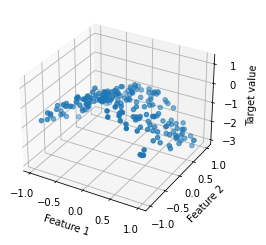

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set(xlabel='Feature 1', ylabel='Feature 2', zlabel='Target value')
ax.scatter(X[:, 0], X[:, 1], y)

In [7]:
# it looks like the data lies on a curve

## (b) - Add polynomial features + Train a Lasso model

In [16]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(5)
X_transformed = pol.fit_transform(X)


In [17]:
X.shape

(199, 2)

In [18]:
X_transformed.shape

(199, 21)

In [19]:
print(X_transformed[1].shape)
print(X_transformed[1])
print(X_transformed[2])

(21,)
[ 1.00000000e+00 -4.00000000e-02 -8.50000000e-01  1.60000000e-03
  3.40000000e-02  7.22500000e-01 -6.40000000e-05 -1.36000000e-03
 -2.89000000e-02 -6.14125000e-01  2.56000000e-06  5.44000000e-05
  1.15600000e-03  2.45650000e-02  5.22006250e-01 -1.02400000e-07
 -2.17600000e-06 -4.62400000e-05 -9.82600000e-04 -2.08802500e-02
 -4.43705312e-01]
[ 1.         -0.59        0.64        0.3481     -0.3776      0.4096
 -0.205379    0.222784   -0.241664    0.262144    0.12117361 -0.13144256
  0.14258176 -0.15466496  0.16777216 -0.07149243  0.07755111 -0.08412324
  0.09125233 -0.09898557  0.10737418]


In [20]:
#separate data into a training and a testing dataset
X_transformed_train = X_transformed[:160]
y_train = y[:160]
X_transformed_test = X_transformed[160:]
y_test = y[160:]
print(X_transformed_train.shape)
print(y_train.shape)
print(X_transformed_test.shape)

(160, 21)
(160,)
(39, 21)


In [21]:
from sklearn.linear_model import Lasso

model_1 = Lasso(alpha=1)
model_1.fit(X_transformed_train, y_train)
model_1.coef_

array([ 0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.])

In [22]:
model_2 = Lasso(alpha=0.5)
model_2.fit(X_transformed_train, y_train)
model_2.coef_

array([ 0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.])

In [23]:
model_3 = Lasso(alpha=0.05)
model_3.fit(X_transformed_train, y_train)
model_3.coef_

array([ 0.        , -0.        , -0.81174124, -1.51442349, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ])

In [24]:
model_4 = Lasso(alpha=0.0005)
model_4.fit(X_transformed_train, y_train)
model_4.coef_

array([ 0.        , -0.05282058, -0.92936461, -1.99213953,  0.        ,
        0.16308742, -0.        , -0.19020589, -0.        ,  0.0472588 ,
        0.07052961,  0.15618841, -0.24530798, -0.16928919, -0.19396691,
        0.02086734, -0.        , -0.08950438, -0.        ,  0.15567542,
       -0.        ])

In [25]:
model_5 = Lasso(alpha=0.00005)
model_5.fit(X_transformed_train, y_train)
model_5.coef_

array([ 0.        ,  0.04152896, -1.06400688, -2.10530432,  0.07162656,
        0.32080547, -0.39585764, -0.17110806, -0.11929152,  0.60278977,
        0.19757875,  0.17292502, -0.24922489, -0.30422622, -0.37715604,
        0.41948135,  0.        , -0.31676494, -0.01271283,  0.42134983,
       -0.46520488])

In [26]:
model_6 = Lasso(alpha=0.000005)
model_6.fit(X_transformed_train, y_train)
model_6.coef_

array([ 0.        ,  0.07187022, -1.08464741, -2.11132413,  0.0794407 ,
        0.33689005, -0.48042323, -0.18994867, -0.19701529,  0.6925768 ,
        0.20198538,  0.18379157, -0.25709513, -0.3246146 , -0.39495992,
        0.48243516,  0.05588211, -0.29498615, -0.05787166,  0.49293649,
       -0.53272437])

## (c) - Generate Predictions and plot them against the original features

In [80]:
print(X_transformed_train[1].shape)
model_6.predict([X_transformed_train[1]])

(21,)


array([0.75346822])

[4.509833283090101, -4.157415132381297, 0.12498868158791421, 4.240104964148108, 3.1892255643020775]
[-3.672868113037394, 4.852775447578166, 0.09162526747048183, -3.9202251372255925, 2.9476205345059823]


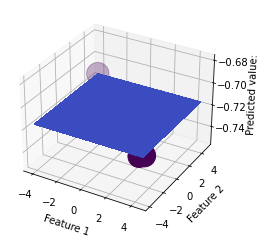

In [180]:
from mpl_toolkits import mplot3d
from matplotlib import cm

ax = plt.axes(projection="3d")
x1 = []
x2 = []
z = [] 
for i in range(5):
    sample_1 = np.random.uniform(-5, 5)
    sample_2 = np.random.uniform(-5, 5)
    x1.append(sample_1)
    x2.append(sample_2)
    pred = model_1.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
    z.append(pred[0])


print(x1)
print(x2)
ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
X, Y = np.meshgrid(np.array(x1), np.array(x2))
Z = np.tile(np.array(z), (5, 1))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted value:')
ax.plot_surface(X, Y, Z,
               cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

[1.37953624265677, 4.178567377293238, 1.3482704034325685, 3.855766541087771, 0.11326789299861595]
[3.2486540462680793, 0.32949956156210725, 1.1039656613465425, -3.4596144429036055, 2.7528634112512567]
[-0.7157901470684186, -0.7157901470684186, -0.7157901470684186, -0.7157901470684186, -0.7157901470684186]
[[1.37953624 4.17856738 1.3482704  3.85576654 0.11326789]
 [1.37953624 4.17856738 1.3482704  3.85576654 0.11326789]
 [1.37953624 4.17856738 1.3482704  3.85576654 0.11326789]
 [1.37953624 4.17856738 1.3482704  3.85576654 0.11326789]
 [1.37953624 4.17856738 1.3482704  3.85576654 0.11326789]]
[[ 3.24865405  3.24865405  3.24865405  3.24865405  3.24865405]
 [ 0.32949956  0.32949956  0.32949956  0.32949956  0.32949956]
 [ 1.10396566  1.10396566  1.10396566  1.10396566  1.10396566]
 [-3.45961444 -3.45961444 -3.45961444 -3.45961444 -3.45961444]
 [ 2.75286341  2.75286341  2.75286341  2.75286341  2.75286341]]


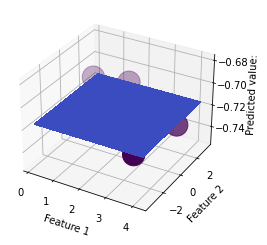

In [182]:
from mpl_toolkits import mplot3d
from matplotlib import cm

ax = plt.axes(projection="3d")
x1 = []
x2 = []
z = [] 
for i in range(5):
    sample_1 = np.random.uniform(-5, 5)
    sample_2 = np.random.uniform(-5, 5)
    x1.append(sample_1)
    x2.append(sample_2)
    pred = model_2.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
    z.append(pred[0])

print(x1)
print(x2)
print(z)
ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
X, Y = np.meshgrid(np.array(x1), np.array(x2))
print(X)
print(Y)

Z = np.tile(np.array(z), (5, 1))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted value:')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

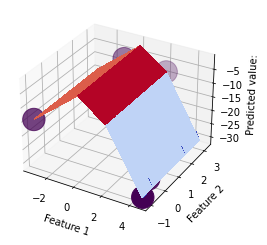

In [137]:
from mpl_toolkits import mplot3d
from matplotlib import cm

ax = plt.axes(projection="3d")
x1 = []
x2 = []
z = [] 
for i in range(5):
    sample_1 = np.random.uniform(-5, 5)
    sample_2 = np.random.uniform(-5, 5)
    x1.append(sample_1)
    x2.append(sample_2)
    pred = model_3.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
    z.append(pred[0])

ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
X, Y = np.meshgrid(np.array(x1), np.array(x2))
Z = np.tile(np.array(z), (5, 1))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted value:')
ax.plot_surface(X, Y, Z,
               cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

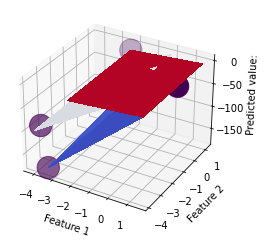

In [138]:
from mpl_toolkits import mplot3d
from matplotlib import cm

ax = plt.axes(projection="3d")
x1 = []
x2 = []
z = [] 
for i in range(5):
    sample_1 = np.random.uniform(-5, 5)
    sample_2 = np.random.uniform(-5, 5)
    x1.append(sample_1)
    x2.append(sample_2)
    pred = model_4.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
    z.append(pred[0])

ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
X, Y = np.meshgrid(np.array(x1), np.array(x2))
Z = np.tile(np.array(z), (5, 1))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted value:')
ax.plot_surface(X, Y, Z,
                cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

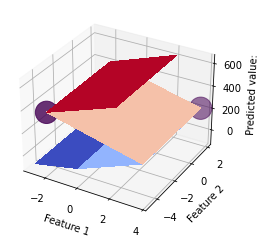

In [131]:
from mpl_toolkits import mplot3d
from matplotlib import cm

ax = plt.axes(projection="3d")
x1 = []
x2 = []
z = [] 
for i in range(5):
    sample_1 = np.random.uniform(-5, 5)
    sample_2 = np.random.uniform(-5, 5)
    x1.append(sample_1)
    x2.append(sample_2)
    pred = model_5.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
    z.append(pred[0])

ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
X, Y = np.meshgrid(np.array(x1), np.array(x2))
Z = np.tile(np.array(z), (5, 1))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted value:')
ax.plot_surface(X, Y, Z,
               cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

## (d) - Test the trained models for performance

In [27]:
from sklearn.metrics import mean_squared_error


def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)  
        
    


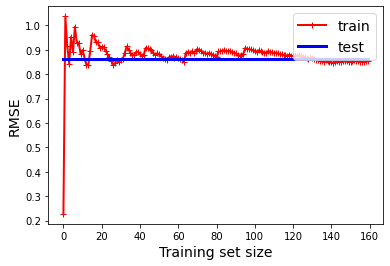

In [28]:
plot_learning_curves(model_1, X_transformed_train, y_train, X_transformed_test, y_test)

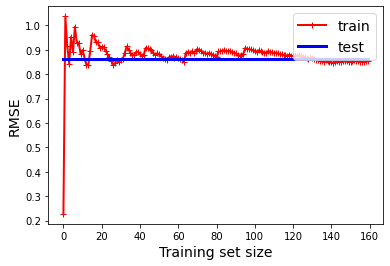

In [29]:
plot_learning_curves(model_2, X_transformed_train, y_train, X_transformed_test, y_test)

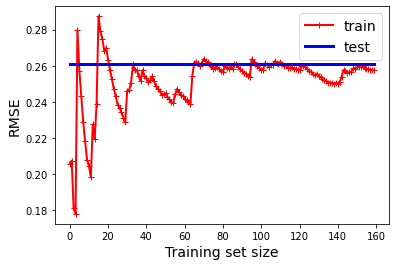

In [30]:
plot_learning_curves(model_3, X_transformed_train, y_train, X_transformed_test, y_test)

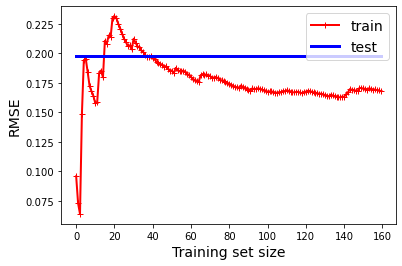

In [31]:
plot_learning_curves(model_4, X_transformed_train, y_train, X_transformed_test, y_test)

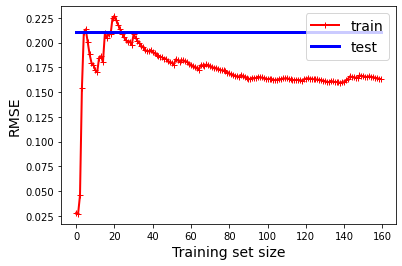

In [32]:
plot_learning_curves(model_5, X_transformed_train, y_train, X_transformed_test, y_test)

## (e) - Repeat the first two requirements for a Ridge regression model

In [33]:
from sklearn.linear_model import Ridge

ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_transformed_train, y_train)
ridge_1.coef_

array([ 0.        , -0.09100215, -0.84562717, -1.37507442,  0.00638737,
        0.11046785, -0.0295834 , -0.21726679,  0.05190534, -0.0381166 ,
       -0.52020531,  0.11143614, -0.37257819, -0.10864361, -0.10231281,
        0.09236982, -0.05757904, -0.04831641,  0.02552502,  0.14270569,
       -0.01649093])

In [34]:
ridge_2 = Ridge(alpha=0.5)
ridge_2.fit(X_transformed_train, y_train)
ridge_2.coef_

array([ 0.        , -0.08159593, -0.8898274 , -1.55770919,  0.01349007,
        0.1709121 , -0.06528703, -0.22055627,  0.03169198,  0.04195177,
       -0.35209095,  0.15407154, -0.37567435, -0.15866006, -0.16971127,
        0.13777924, -0.04054454, -0.09291551,  0.02062891,  0.197009  ,
       -0.04780265])

In [35]:
ridge_3 = Ridge(alpha=0.05)
ridge_3.fit(X_transformed_train, y_train)
ridge_3.coef_

array([ 0.        ,  0.01501701, -1.02148332, -2.00942249,  0.06098729,
        0.31282548, -0.31526559, -0.20755604, -0.11551427,  0.45172546,
        0.10144413,  0.18598834, -0.28662756, -0.29111473, -0.35597932,
        0.35122152,  0.03094002, -0.26933096, -0.02270814,  0.41099361,
       -0.33924378])

In [36]:
ridge_4 = Ridge(alpha=0.005)
ridge_4.fit(X_transformed_train, y_train)
ridge_4.coef_

array([ 0.        ,  0.06634675, -1.07773256, -2.10115944,  0.07865879,
        0.33593304, -0.46299756, -0.19629198, -0.19246223,  0.66710029,
        0.1919008 ,  0.18430868, -0.2600415 , -0.32347657, -0.39254573,
        0.46845789,  0.06003289, -0.29330148, -0.05594357,  0.48949231,
       -0.51164084])

In [37]:
ridge_5 = Ridge(alpha=0.0005)
ridge_5.fit(X_transformed_train, y_train)
ridge_5.coef_

array([ 0.        ,  0.07422481, -1.08596442, -2.11088066,  0.08031633,
        0.33833874, -0.48653314, -0.19340169, -0.20441329,  0.6990845 ,
        0.20135756,  0.18478167, -0.2580091 , -0.32678331, -0.39643707,
        0.486808  ,  0.0631453 , -0.29285566, -0.06228908,  0.49994678,
       -0.53740314])

In [159]:
from mpl_toolkits import mplot3d
from matplotlib import cm

def plot_pred_grid(model):
    ax = plt.axes(projection="3d")
    x1 = []
    x2 = []
    z = [] 
    for i in range(5):
        sample_1 = np.random.uniform(-5, 5)
        sample_2 = np.random.uniform(-5, 5)
        x1.append(sample_1)
        x2.append(sample_2)
        pred = model.predict(pol.fit_transform(np.column_stack((sample_1,sample_2))))
        z.append(pred[0])

    ax.scatter(x1, x2, z, c=[90, 90, 90, 90, 90], s =[500, 500, 500, 500, 500])
    X, Y = np.meshgrid(np.array(x1), np.array(x2))
    Z = np.tile(np.array(z), (5, 1))

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Predicted value:')
    ax.plot_surface(X, Y, Z,
               cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    plt.show()

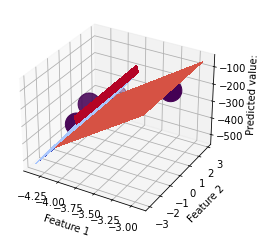

In [160]:
plot_pred_grid(ridge_1)

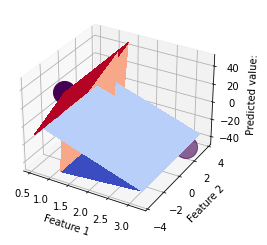

In [161]:
plot_pred_grid(ridge_2)

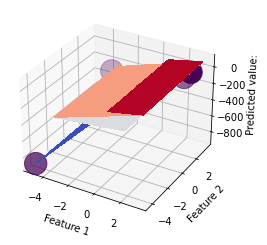

In [162]:
plot_pred_grid(ridge_3)

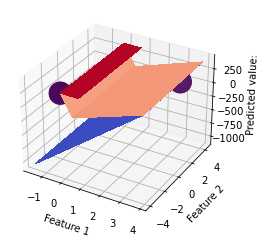

In [163]:
plot_pred_grid(ridge_4)

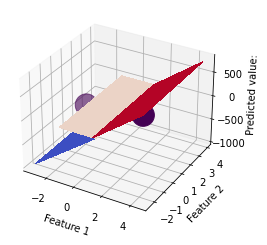

In [164]:
plot_pred_grid(ridge_5)

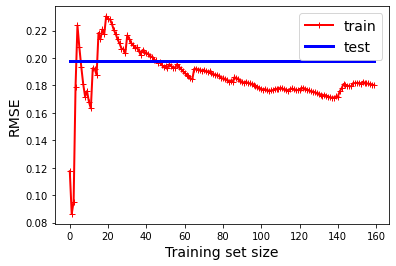

In [38]:
plot_learning_curves(ridge_1, X_transformed_train, y_train, X_transformed_test, y_test)

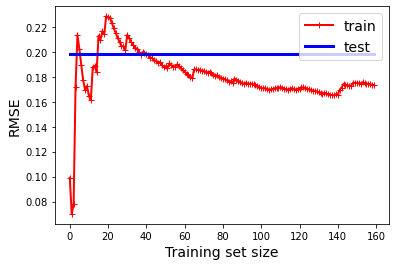

In [39]:
plot_learning_curves(ridge_2, X_transformed_train, y_train, X_transformed_test, y_test)

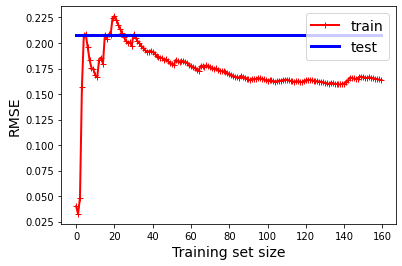

In [40]:
plot_learning_curves(ridge_3, X_transformed_train, y_train, X_transformed_test, y_test)

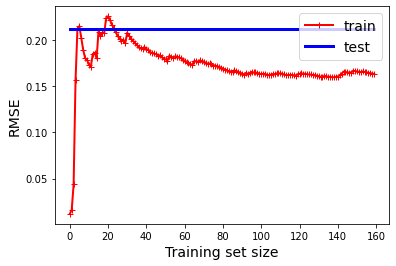

In [41]:
plot_learning_curves(ridge_4, X_transformed_train, y_train, X_transformed_test, y_test)

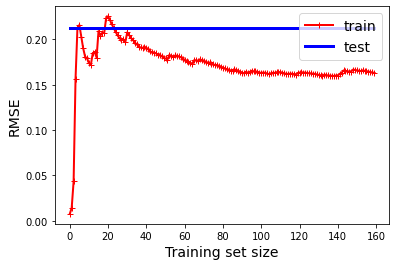

In [42]:
plot_learning_curves(ridge_5, X_transformed_train, y_train, X_transformed_test, y_test)

# (i) - Cross validation in order to select parameter c

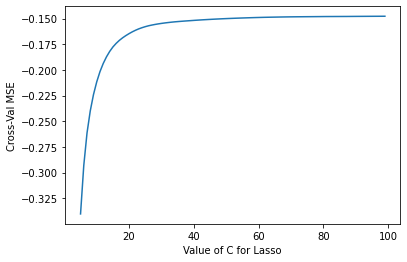

In [64]:
# search for an optimal value for C

from sklearn.model_selection import cross_val_score
C_range = range(5, 100)
C_scores = []
for C in C_range:
    lasso = Lasso(alpha=1/(2*C))
    scores = cross_val_score(lasso, X_transformed, y, cv=5, scoring='neg_mean_absolute_error')
    C_scores.append(scores.mean())

plt.plot(C_range, C_scores)
plt.xlabel('Value of C for Lasso')
plt.ylabel('Cross-Val MSE')
plt.show()

#obs using a value around 10 would be enough - early stopping + avoid overfitting

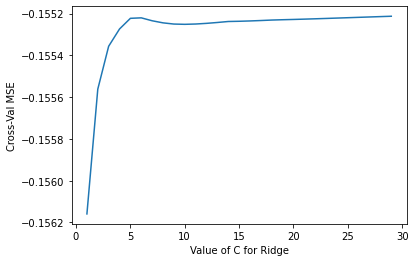

In [66]:
# search for an optimal value for C

from sklearn.model_selection import cross_val_score
C_range = range(1, 30)
C_scores = []
for C in C_range:
    ridge = Ridge(alpha=1/(2*C))
    scores = cross_val_score(ridge, X_transformed, y, cv=5, scoring='neg_mean_absolute_error')
    C_scores.append(scores.mean())

plt.plot(C_range, C_scores)
plt.xlabel('Value of C for Ridge')
plt.ylabel('Cross-Val MSE')
plt.show()